# **Setup dan Import Library**

In [28]:
# Install required packages
!pip install plotly -q
!pip install wordcloud -q
!pip install seaborn -q

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

print("✅ All libraries imported successfully!")
print("📊 Starting Data Exploration Phase...")

✅ All libraries imported successfully!
📊 Starting Data Exploration Phase...


# **Data Loading**

In [29]:
# Upload file dari lokal (sesuai permintaan)
from google.colab import files

print("📁 Please upload your AI Assistant Usage dataset (CSV file):")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]
print(f"📄 File uploaded: {filename}")

# Load dataset
df = pd.read_csv(filename)
print(f"✅ Dataset loaded successfully!")
print(f"📏 Dataset shape: {df.shape}")


📁 Please upload your AI Assistant Usage dataset (CSV file):


Saving ai_assistant_usage_student_life.csv to ai_assistant_usage_student_life.csv
📄 File uploaded: ai_assistant_usage_student_life.csv
✅ Dataset loaded successfully!
📏 Dataset shape: (10000, 11)


# **Profil Data Awal**

In [30]:
print("\n" + "="*60)
print("📋 BASIC DATA INFORMATION")
print("="*60)

# Display first few rows
print("\n🔍 First 5 rows:")
print(df.head())

print("\n📊 Dataset Info:")
print(df.info())

print("\n📈 Statistical Summary:")
print(df.describe())

print("\n🏷️ Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


📋 BASIC DATA INFORMATION

🔍 First 5 rows:
      SessionID   StudentLevel        Discipline SessionDate  \
0  SESSION00001  Undergraduate  Computer Science  2024-11-03   
1  SESSION00002  Undergraduate        Psychology  2024-08-25   
2  SESSION00003  Undergraduate          Business  2025-01-12   
3  SESSION00004  Undergraduate  Computer Science  2025-05-06   
4  SESSION00005  Undergraduate        Psychology  2025-03-18   

   SessionLengthMin  TotalPrompts  TaskType  AI_AssistanceLevel  \
0             31.20            11  Studying                   2   
1             13.09             6  Studying                   3   
2             19.22             5    Coding                   3   
3              3.70             1    Coding                   3   
4             28.12             9   Writing                   3   

           FinalOutcome  UsedAgain  SatisfactionRating  
0  Assignment Completed       True                 1.0  
1  Assignment Completed       True                 2.0 

# **Data Quality Assessment**

In [31]:
print("\n" + "="*60)
print("🔍 DATA QUALITY ASSESSMENT")
print("="*60)

# Missing values
print("\n❓ Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
}).round(2)

print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"⚠️ Total missing values: {missing_df['Missing_Count'].sum()}")

# Duplicate values
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"⚠️ {duplicates} duplicate rows found ({duplicates/len(df)*100:.2f}%)")
else:
    print("✅ No duplicate rows found!")

# Data types
print("\n📊 Data Types Distribution:")
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)


🔍 DATA QUALITY ASSESSMENT

❓ Missing Values Analysis:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []
✅ No missing values found!

🔄 Duplicate rows: 0
✅ No duplicate rows found!

📊 Data Types Distribution:
object     6
float64    2
int64      2
bool       1
Name: count, dtype: int64


# **Analisis Univariat**


📊 UNIVARIATE ANALYSIS

📝 Categorical columns (6): ['SessionID', 'StudentLevel', 'Discipline', 'SessionDate', 'TaskType', 'FinalOutcome']
🔢 Numerical columns (4): ['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating']

🏷️ Categorical Variables Analysis:

--- SessionID ---
Unique values: 10000
Top 5 values:
SessionID
SESSION09984    1
SESSION09983    1
SESSION09982    1
SESSION09981    1
SESSION09980    1
Name: count, dtype: int64

--- StudentLevel ---
Unique values: 3
Top 5 values:
StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64


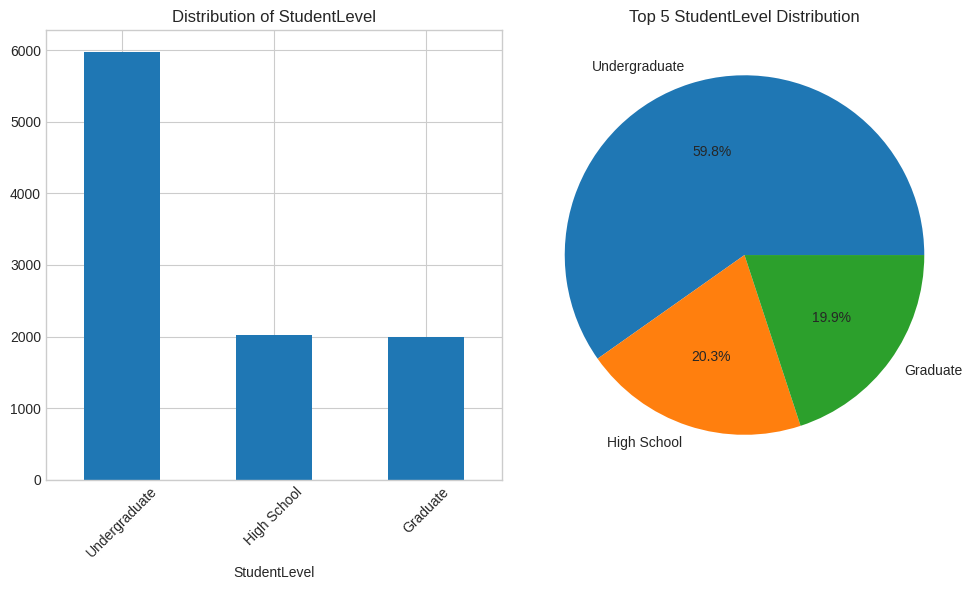


--- Discipline ---
Unique values: 7
Top 5 values:
Discipline
Biology             1458
Computer Science    1445
Engineering         1430
Math                1422
Psychology          1418
Name: count, dtype: int64


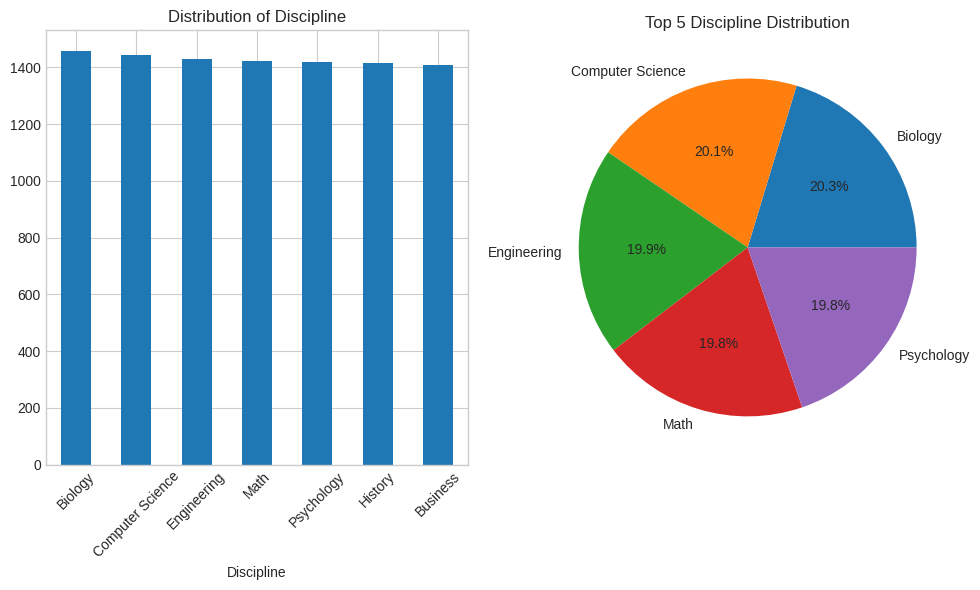


--- SessionDate ---
Unique values: 366
Top 5 values:
SessionDate
2025-01-19    41
2025-06-21    41
2025-04-16    41
2025-04-03    41
2024-08-15    41
Name: count, dtype: int64

--- TaskType ---
Unique values: 6
Top 5 values:
TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Name: count, dtype: int64


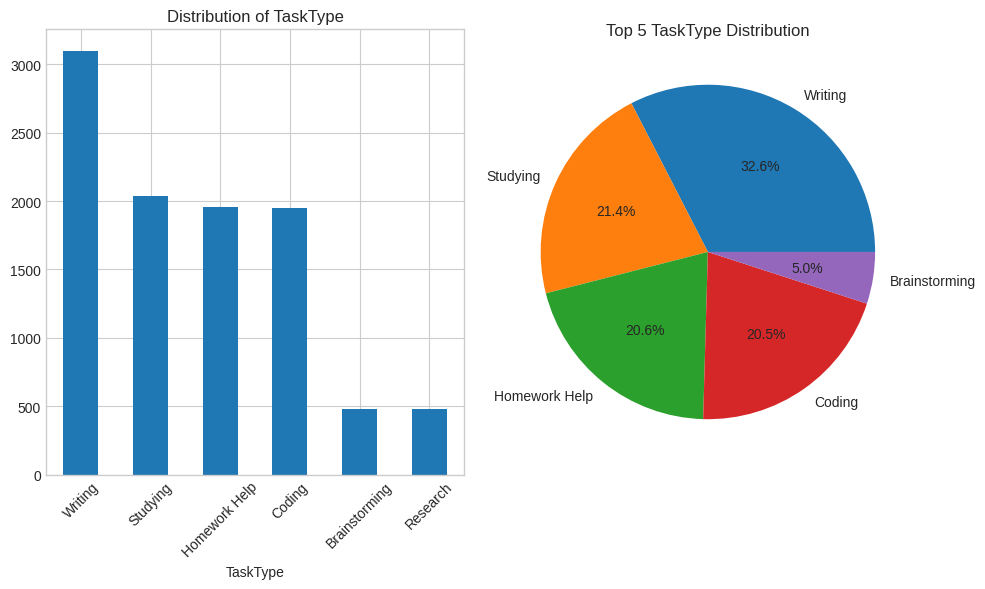


--- FinalOutcome ---
Unique values: 4
Top 5 values:
FinalOutcome
Assignment Completed    4768
Idea Drafted            2866
Confused                1613
Gave Up                  753
Name: count, dtype: int64


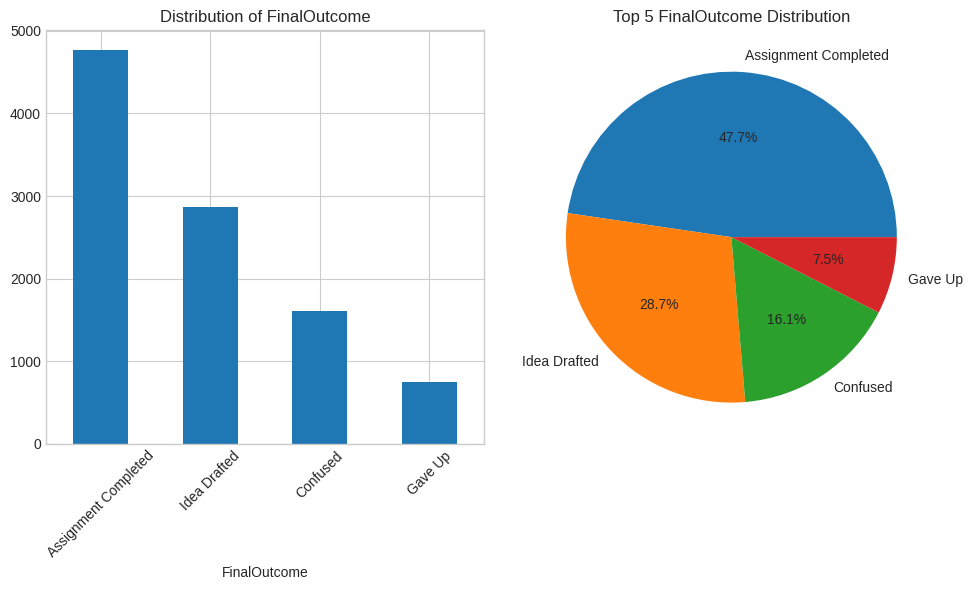


🔢 Numerical Variables Analysis:
       SessionLengthMin  TotalPrompts  AI_AssistanceLevel  SatisfactionRating
count      10000.000000  10000.000000        10000.000000        10000.000000
mean          19.846467      5.607500            3.479500            3.417780
std           13.897302      4.648764            0.991805            1.143331
min            0.030000      1.000000            1.000000            1.000000
25%            9.630000      2.000000            3.000000            2.600000
50%           16.650000      4.000000            4.000000            3.500000
75%           26.670000      8.000000            4.000000            4.400000
max          110.810000     39.000000            5.000000            5.000000


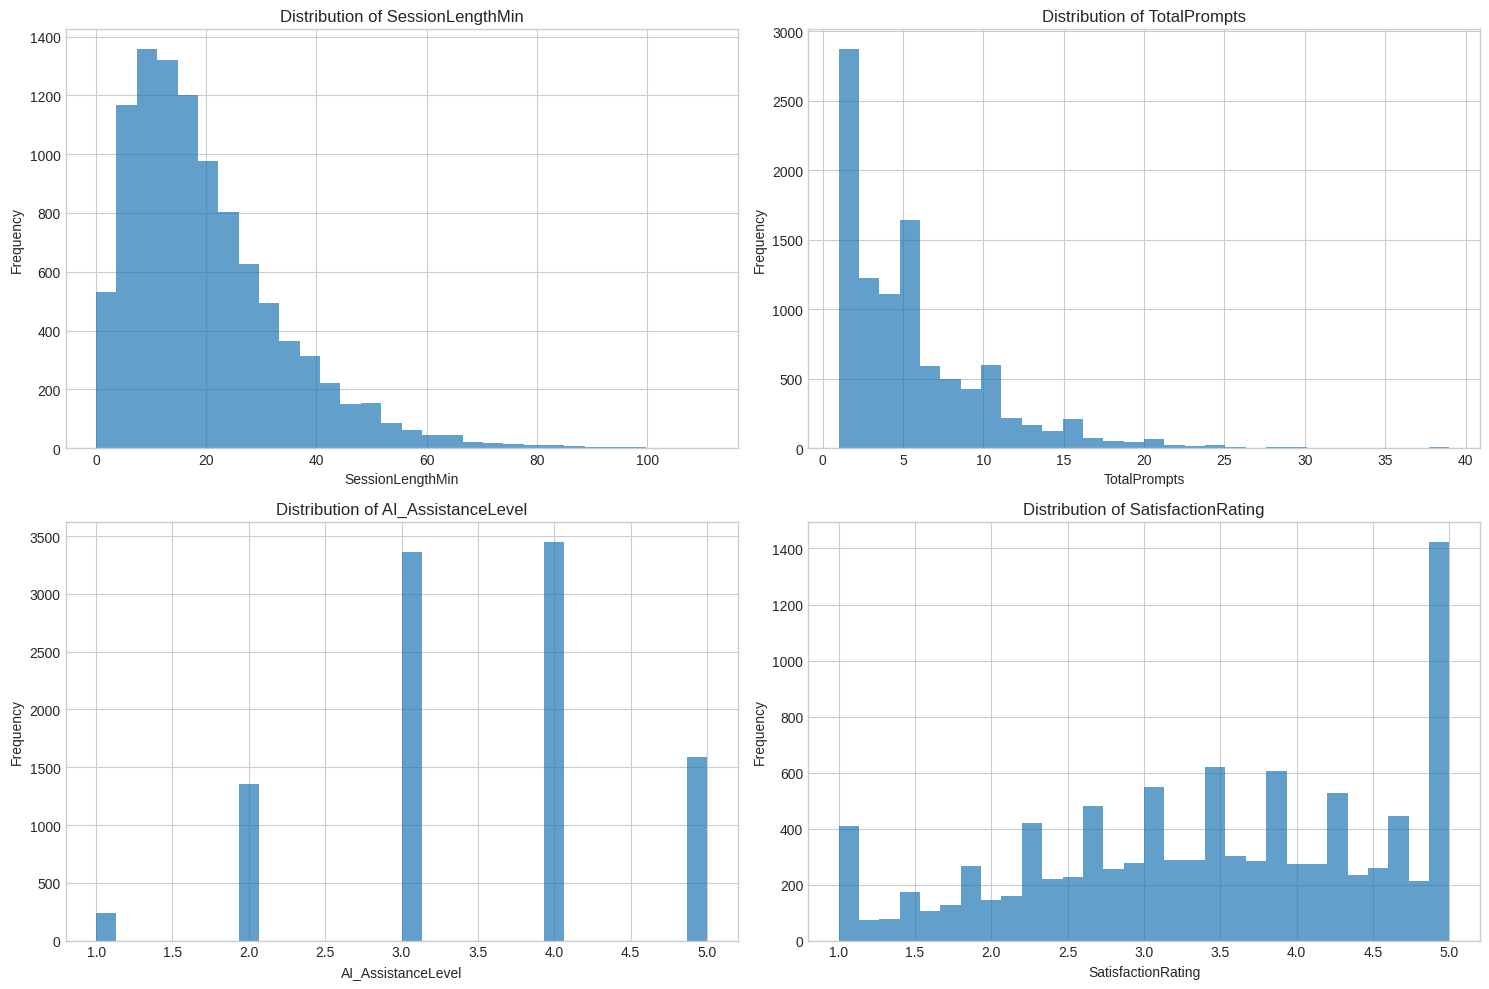

In [32]:
print("\n" + "="*60)
print("📊 UNIVARIATE ANALYSIS")
print("="*60)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n📝 Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"🔢 Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# Analyze categorical variables
if categorical_cols:
    print("\n🏷️ Categorical Variables Analysis:")
    for col in categorical_cols:
        print(f"\n--- {col} ---")
        value_counts = df[col].value_counts()
        print(f"Unique values: {df[col].nunique()}")
        print("Top 5 values:")
        print(value_counts.head())

        if df[col].nunique() <= 20:  # Only show for reasonable number of categories
            # Create visualization
            plt.figure(figsize=(10, 6))
            plt.subplot(1, 2, 1)
            df[col].value_counts().head(10).plot(kind='bar')
            plt.title(f'Distribution of {col}')
            plt.xticks(rotation=45)

            plt.subplot(1, 2, 2)
            plt.pie(df[col].value_counts().head(5), labels=df[col].value_counts().head(5).index, autopct='%1.1f%%')
            plt.title(f'Top 5 {col} Distribution')

            plt.tight_layout()
            plt.show()

# Analyze numerical variables
if numerical_cols:
    print("\n🔢 Numerical Variables Analysis:")

    # Statistical summary
    print(df[numerical_cols].describe())

    # Distribution plots
    n_cols = len(numerical_cols)
    if n_cols > 0:
        fig, axes = plt.subplots(nrows=(n_cols+1)//2, ncols=2, figsize=(15, 5*((n_cols+1)//2)))
        if n_cols == 1:
            axes = [axes]
        elif (n_cols+1)//2 == 1:
            axes = [axes]
        else:
            axes = axes.flatten()

        for i, col in enumerate(numerical_cols):
            if i < len(axes):
                df[col].hist(bins=30, ax=axes[i], alpha=0.7)
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')

        # Hide empty subplots
        for i in range(len(numerical_cols), len(axes)):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()

# **Analisis Bivariat**


🔗 BIVARIATE ANALYSIS

📈 Correlation Matrix:
                    SessionLengthMin  TotalPrompts  AI_AssistanceLevel  \
SessionLengthMin            1.000000      0.902317           -0.006848   
TotalPrompts                0.902317      1.000000           -0.006355   
AI_AssistanceLevel         -0.006848     -0.006355            1.000000   
SatisfactionRating         -0.011136     -0.009561            0.775513   

                    SatisfactionRating  
SessionLengthMin             -0.011136  
TotalPrompts                 -0.009561  
AI_AssistanceLevel            0.775513  
SatisfactionRating            1.000000  


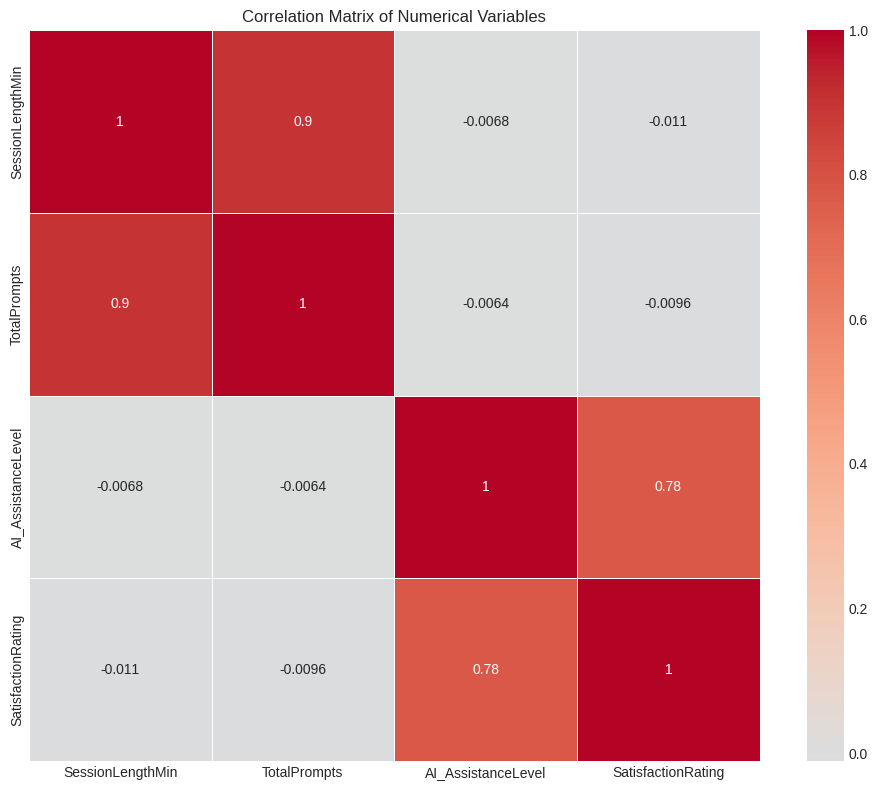


🏷️ Categorical Variables Relationships:


In [33]:
print("\n" + "="*60)
print("🔗 BIVARIATE ANALYSIS")
print("="*60)

# Correlation analysis for numerical variables
if len(numerical_cols) > 1:
    print("\n📈 Correlation Matrix:")
    correlation_matrix = df[numerical_cols].corr()
    print(correlation_matrix)

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()

# Cross-tabulation for categorical variables
if len(categorical_cols) > 1:
    print("\n🏷️ Categorical Variables Relationships:")
    # Select first two categorical columns for demonstration
    if len(categorical_cols) >= 2:
        col1, col2 = categorical_cols[0], categorical_cols[1]
        if df[col1].nunique() <= 10 and df[col2].nunique() <= 10:
            crosstab = pd.crosstab(df[col1], df[col2])
            print(f"\nCross-tabulation: {col1} vs {col2}")
            print(crosstab)

            # Visualization
            plt.figure(figsize=(12, 6))
            sns.countplot(data=df, x=col1, hue=col2)
            plt.title(f'Distribution of {col1} by {col2}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# **Target Variabel Analisis**


🎯 POTENTIAL TARGET VARIABLES ANALYSIS

--- Analysis for: TaskType ---
Unique values: 6
Distribution:
TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64


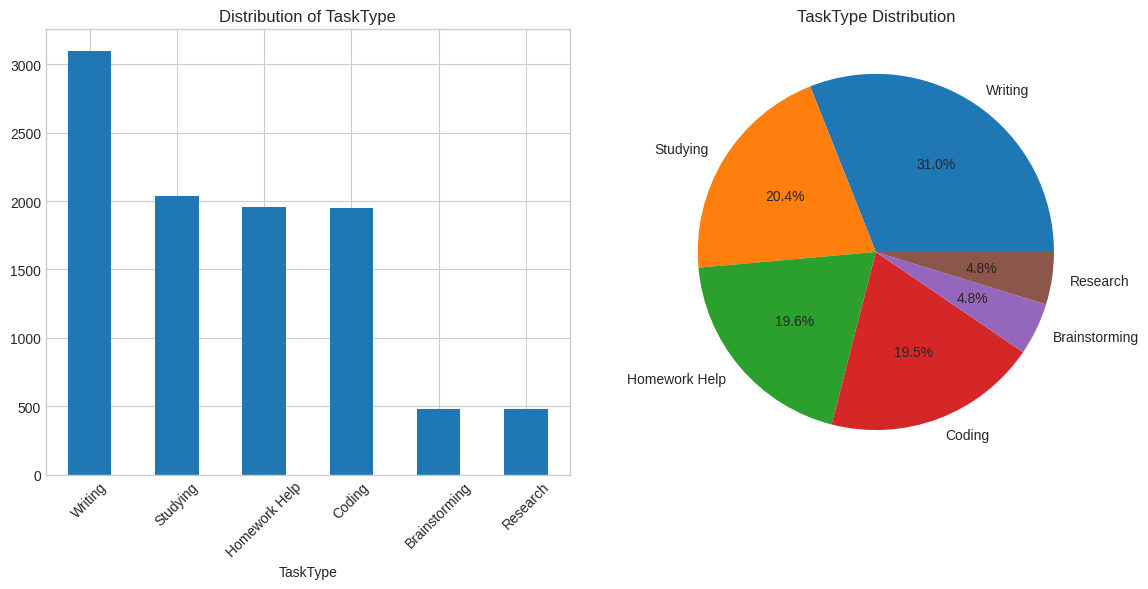

In [34]:
# Try to identify potential target variables
potential_targets = []
for col in categorical_cols:
    if any(keyword in col.lower() for keyword in ['category', 'type', 'class', 'usage', 'purpose']):
        potential_targets.append(col)

if potential_targets:
    print("\n🎯 POTENTIAL TARGET VARIABLES ANALYSIS")
    print("="*60)

    for target in potential_targets:
        print(f"\n--- Analysis for: {target} ---")
        print(f"Unique values: {df[target].nunique()}")
        print("Distribution:")
        print(df[target].value_counts())

        # Visualization
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        df[target].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {target}')
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        plt.pie(df[target].value_counts(), labels=df[target].value_counts().index, autopct='%1.1f%%')
        plt.title(f'{target} Distribution')

        plt.tight_layout()
        plt.show()

# **Analisis Teks Data**

In [35]:
# Identify text columns
text_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        # Check if it's likely a text column (average length > 50 characters)
        avg_length = df[col].dropna().astype(str).str.len().mean()
        if avg_length > 50:
            text_cols.append(col)

if text_cols:
    print("\n📝 TEXT DATA ANALYSIS")
    print("="*60)

    for col in text_cols:
        print(f"\n--- Text Analysis for: {col} ---")
        text_data = df[col].dropna().astype(str)

        print(f"Average text length: {text_data.str.len().mean():.2f} characters")
        print(f"Minimum text length: {text_data.str.len().min()} characters")
        print(f"Maximum text length: {text_data.str.len().max()} characters")

        # Text length distribution
        plt.figure(figsize=(10, 6))
        text_data.str.len().hist(bins=30, alpha=0.7)
        plt.title(f'Text Length Distribution - {col}')
        plt.xlabel('Text Length (characters)')
        plt.ylabel('Frequency')
        plt.show()

        # Sample texts
        print(f"\nSample texts from {col}:")
        for i, text in enumerate(text_data.head(3)):
            print(f"{i+1}. {text[:200]}..." if len(text) > 200 else f"{i+1}. {text}")

# **Evaluasi Model**

In [37]:
print("\n" + "="*60)
print("🎯 EVALUATE MODEL")
print("="*60)

insights = []

# Dataset overview
insights.append(f"📊 Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns")

# Data quality
if missing_df['Missing_Count'].sum() == 0:
    insights.append("✅ No missing values - clean dataset")
else:
    insights.append(f"⚠️ {missing_df['Missing_Count'].sum()} missing values need attention")

if duplicates == 0:
    insights.append("✅ No duplicate records found")
else:
    insights.append(f"⚠️ {duplicates} duplicate records need handling")

# Variable types
insights.append(f"📝 {len(categorical_cols)} categorical and {len(numerical_cols)} numerical variables")

# Text data
if text_cols:
    insights.append(f"📄 {len(text_cols)} text columns identified for summarization tasks")

# Potential targets
if potential_targets:
    insights.append(f"🎯 {len(potential_targets)} potential target variable(s) identified: {', '.join(potential_targets)}")

print("\n📋 Summary of Findings:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


🎯 EVALUATE MODEL

📋 Summary of Findings:
1. 📊 Dataset contains 10,000 rows and 11 columns
2. ✅ No missing values - clean dataset
3. ✅ No duplicate records found
4. 📝 6 categorical and 4 numerical variables
5. 🎯 1 potential target variable(s) identified: TaskType


# **Ekspor Hasil Evaluasi**

In [38]:
# Create summary dataframe
summary_stats = {
    'Total_Rows': df.shape[0],
    'Total_Columns': df.shape[1],
    'Missing_Values': missing_df['Missing_Count'].sum(),
    'Duplicate_Rows': duplicates,
    'Categorical_Vars': len(categorical_cols),
    'Numerical_Vars': len(numerical_cols),
    'Text_Vars': len(text_cols),
    'Potential_Targets': len(potential_targets)
}

summary_df = pd.DataFrame([summary_stats])
print("\n📊 Dataset Summary Statistics:")
print(summary_df)

print("\n" + "="*60)
print("✅ DATA EXPLORATION COMPLETED!")
print("="*60)
print("Next steps:")
print("1. 📝 Review the insights above")
print("2. 🔧 Proceed to data preprocessing (Notebook 2)")
print("3. 🎯 Define classification and summarization tasks")
print("4. 📊 Plan visualization strategy")

# Save exploration results for next notebooks
exploration_results = {
    'categorical_cols': categorical_cols,
    'numerical_cols': numerical_cols,
    'text_cols': text_cols,
    'potential_targets': potential_targets,
    'dataset_shape': df.shape,
    'summary_stats': summary_stats
}

# Display final dataset info
print(f"\n📋 Ready for next phase with dataset: {df.shape[0]} rows × {df.shape[1]} columns")


📊 Dataset Summary Statistics:
   Total_Rows  Total_Columns  Missing_Values  Duplicate_Rows  \
0       10000             11               0               0   

   Categorical_Vars  Numerical_Vars  Text_Vars  Potential_Targets  
0                 6               4          0                  1  

✅ DATA EXPLORATION COMPLETED!
Next steps:
1. 📝 Review the insights above
2. 🔧 Proceed to data preprocessing (Notebook 2)
3. 🎯 Define classification and summarization tasks
4. 📊 Plan visualization strategy

📋 Ready for next phase with dataset: 10000 rows × 11 columns
